# Titanic: Machine Learning from Disaster

First, let us import the important libraries for our analysis

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

Let us import the dataset into the notebook

In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Variable and feature identification

The information regarding each of the variables in the dataset is given below :

**survival**: Survival	0 = No, 1 = Yes  
**pclass**:   Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  
**sex**:      Sex	  
**Age**:      Age in years  	
**sibsp**:    # of siblings / spouses aboard the Titanic  	
**parch**:    # of parents / children aboard the Titanic  	
**ticket**:   Ticket number  	
**fare**:     Passenger fare  	
**cabin**:    Cabin number  	
**embarked**: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Going by the given problem statement, our aim would be to predict the **survival** of a passeneger with a given unique feature set. The feature set includes all the features excluding **survival**. Going forward, we explore the data using visualization techniques and peform feature engineering to make more sense out of our data and build a better model.  

## Exploratory Data Analysis

In [4]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Univariate Analysis

Text(0, 0.5, 'Count')

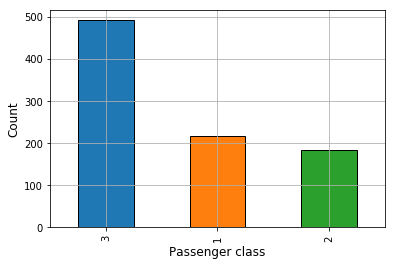

In [7]:
fig,ax=plt.subplots()
data['Pclass'].value_counts().plot.bar(stacked=False,ax=ax,grid=True,edgecolor='black')
ax.set_xlabel('Passenger class', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

From the above plot, we find that most of the people bought **3rd class** tickets follwed by **1st class** and then **2nd class**. 

Text(0, 0.5, 'Count')

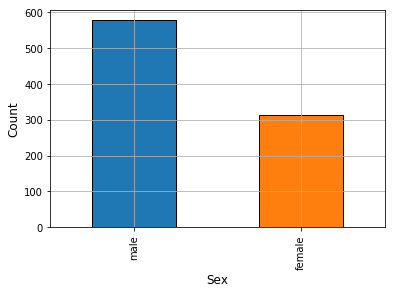

In [9]:
fig,ax=plt.subplots()
data['Sex'].value_counts().plot.bar(stacked=False,ax=ax,grid=True,edgecolor='black')
ax.set_xlabel('Sex', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

Majority of the people on board were **male**. There were 81.25% more males on board wehen compared to females.

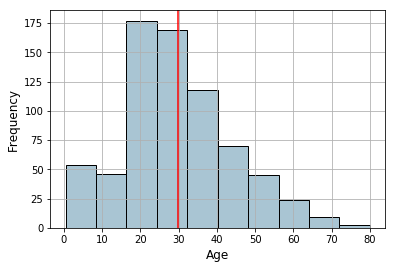

In [8]:
fig, ax = plt.subplots()
data['Age'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=True)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.axvline(data['Age'].mean(),color='r')

We find that majority of the people who boarded were around the age **20-30**. The average age of the people on board was around **30 years**.

Let us look at the different levels in the feature **Siblings and Spouses**

In [10]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Text(0, 0.5, 'Count')

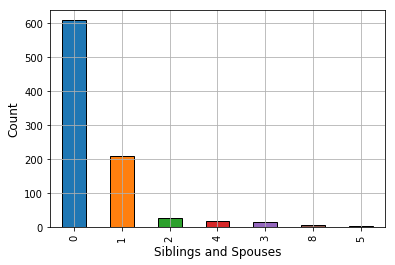

In [11]:
fig,ax=plt.subplots()
data['SibSp'].value_counts().plot.bar(stacked=False,ax=ax,grid=True,edgecolor='black')
ax.set_xlabel('Siblings and Spouses', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

We find that there are many singles on board the Titanic. Then there were people either with their spouses or siblings.

Text(0, 0.5, 'Count')

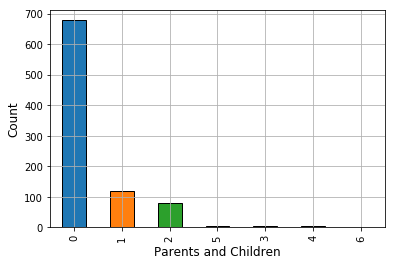

In [12]:
fig,ax=plt.subplots()
data['Parch'].value_counts().plot.bar(stacked=False,ax=ax,grid=True,edgecolor='black')
ax.set_xlabel('Parents and Children', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

This plot again signifies that there were a lot of single people on board. The number of people with children or parents was relatively very less.

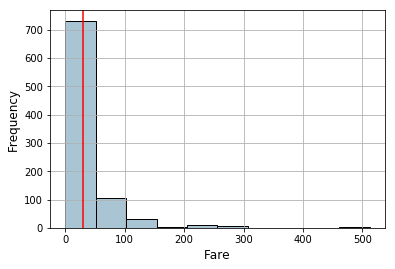

In [13]:
fig, ax = plt.subplots()
data['Fare'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=True)
ax.set_xlabel('Fare', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.axvline(data['Age'].mean(),color='r')

Most of the tickets that were sold are in the bracket of 0-100 dollars.   

In [14]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Here, we find a problem. The minimum fare is found to be 0. Either these passengers were given a complimentary ticket or data is missing. Since there is no source to confirm these observations, we leave the values as they are.

Text(0, 0.5, 'Count')

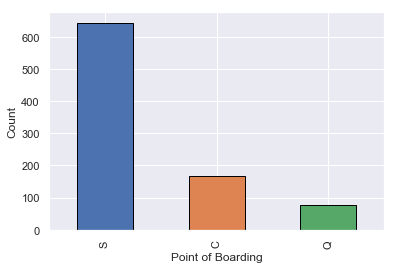

In [18]:
fig,ax=plt.subplots()
data['Embarked'].value_counts().plot.bar(stacked=False,ax=ax,grid=True,edgecolor='black')
ax.set_xlabel('Point of Boarding', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

More than **70%** of people boarded the cruise from Southampton.

### Multivariate Analysis

Let us now look at each predictor from the survival point of view. 

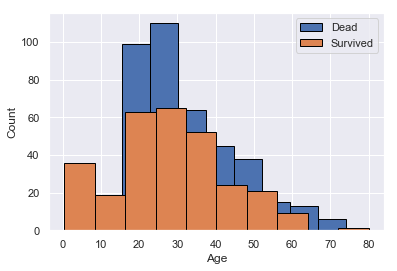

In [17]:
fig,ax=plt.subplots()
data.groupby('Survived')['Age'].hist(stacked=False,ax=ax,grid=True,edgecolor='black')
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(['Dead','Survived'])

From the above plot, we find that many of the passengers within the age 20 were saved. But sadly, many passengers between the age 20-50 were killed in the mishap. The same trend was observed for the people between 50-70, but at a smaller scale. People above 70 were also saved, thus giving us an idea of the evacuation operation.    

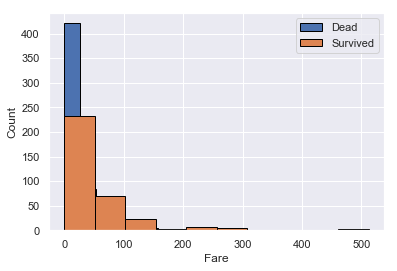

In [16]:
fig,ax=plt.subplots()
data.groupby('Survived')['Fare'].hist(stacked=False,ax=ax,grid=True,edgecolor='black')
ax.set_xlabel('Fare', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(['Dead','Survived'])

The people who bought high price tickets were given first preference during the evacuation. The people who had bought low price tickets were not neglected, but the size of such population made it difficult for everyone to be saved.

c:\users\akhil reddy\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Survived')

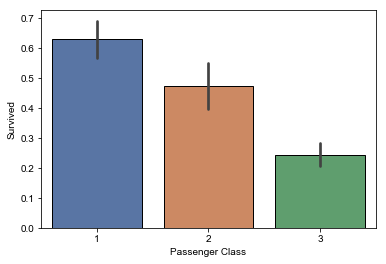

In [15]:
fig,ax=plt.subplots()
sns.set(style="darkgrid")
sns.barplot(x='Pclass',y='Survived',data=data,ax=ax,edgecolor='black')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Survived')

People who bought first class tickets were given higher preference during the evacuation and thus the survival rate is high.

Text(0, 0.5, 'Survived')

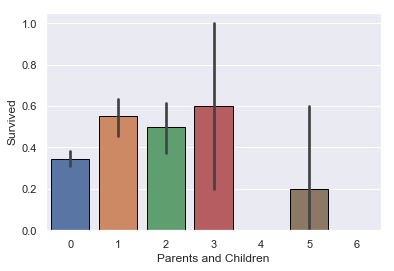

In [19]:
fig,ax=plt.subplots()
sns.set(style="darkgrid")
sns.barplot(x='Parch',y='Survived',data=data,ax=ax,edgecolor='black')
ax.set_xlabel('Parents and Children')
ax.set_ylabel('Survived')

As we see here, people with parents and children were given more preference during the evacuation process. This seems plausible since the children and parents belong to extreme age brackets.

Text(0, 0.5, 'Survived')

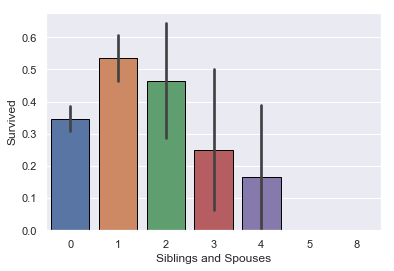

In [23]:
fig,ax=plt.subplots()
sns.set(style="darkgrid")
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax,edgecolor='black')
ax.set_xlabel('Siblings and Spouses')
ax.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

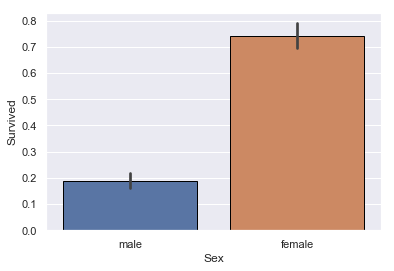

In [22]:
fig,ax=plt.subplots()
sns.set(style="darkgrid")
sns.barplot(x='Sex',y='Survived',data=data,ax=ax,edgecolor='black')
ax.set_xlabel('Sex')
ax.set_ylabel('Survived')

Woah, we find that females had a higher rate of survival. Thus, we can be sure that **Sex** is one of the predictors in the model.

Text(0, 0.5, 'Survived')

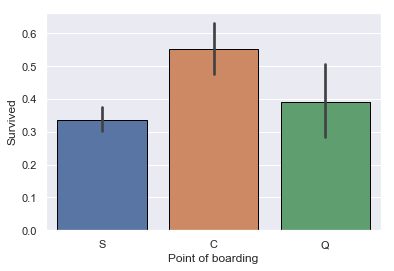

In [21]:
fig,ax=plt.subplots()
sns.set(style="darkgrid")
sns.barplot(x='Embarked',y='Survived',data=data,ax=ax,edgecolor='black')
ax.set_xlabel('Point of boarding')
ax.set_ylabel('Survived')

Though this could have happened at random, we see that the people who have boarded the cruise at Cherbourg have the highest rate of survival amongst the three.  

Let us see the average fare of different boadring points.

Text(0, 0.5, 'Fare')

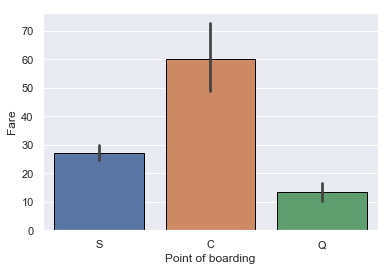

In [20]:
fig,ax=plt.subplots()
sns.set(style="darkgrid")
sns.barplot(x='Embarked',y='Fare',data=data,ax=ax,edgecolor='black')
ax.set_xlabel('Point of boarding')
ax.set_ylabel('Fare')

Tada, we find that the average fare is highest for Cherbourg port. Remember that Cherbourg port had the highest rate of survival. Thus, we can clearly distinguish that people who had bought higher fare tickets were given priority during the evacuation process.

To further analyse the data, let us compare other sets of variables at once so that we can get a clearer picture of some ambiguous variables.

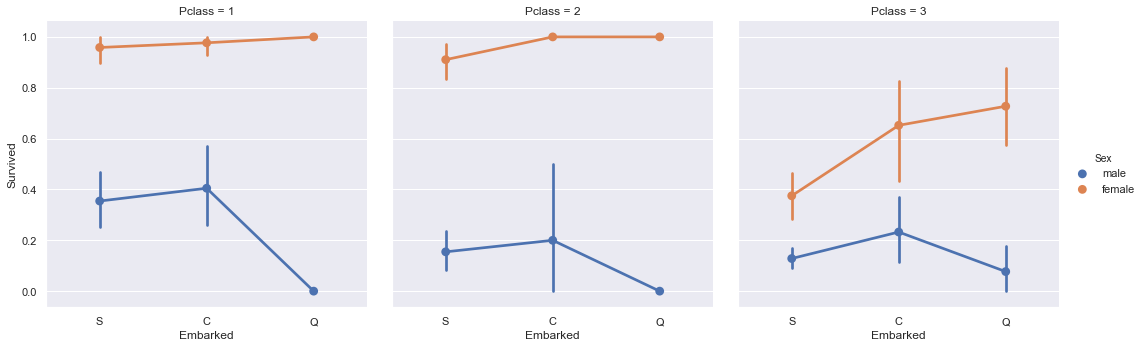

In [24]:
sns.catplot(x='Embarked',y='Survived',hue='Sex',col='Pclass',kind='point',data=data)

From the above plots, we observe that irrespective of the ticket class and Emabrked site, the survival rate of females was much higher than that of the males. Almost all females from class 1 and class 2 were rescued during the evacuation but 30-50% females were left out from class 3. The survival rate of males from Cherbourg was higher in all the cases whereas for females, it was highest for the ones from Queenstown.

Text(0.5, 1.0, 'Pclass=3')

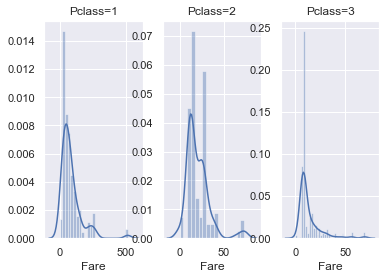

In [25]:
fig,ax=plt.subplots(1,3)
sns.distplot(data[data['Pclass']==1]['Fare'],ax=ax[0])
ax[0].set_title('Pclass=1')
sns.distplot(data[data['Pclass']==2]['Fare'],ax=ax[1])
ax[1].set_title('Pclass=2')
sns.distplot(data[data['Pclass']==3]['Fare'],ax=ax[2])
ax[2].set_title('Pclass=3')

We see that the fare distribution in all the classes is right skewed. This problem can be overcome by binning of the data, which is done in the feature engineering section.

Text(0.5, 1.0, 'Female')

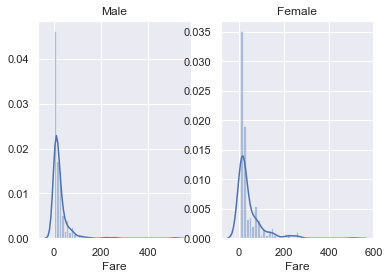

In [26]:
fig,ax=plt.subplots(1,2)
sns.distplot(data[data['Sex']=='male']['Fare'],ax=ax[0])
ax[0].set_title('Male')
sns.distplot(data[data['Sex']=='female']['Fare'],ax=ax[1])
ax[1].set_title('Female')

## Missing Value Treatment

We find that among the continous variables, only Age has missing values in the training data. In the testing data, we have null values for both Age and Fare. We will replace the missing values by using the mean value of the particular sex.

In [28]:
data.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [30]:
data.loc[(data['Age'].isnull()) & (data['Sex']=='male'),'Age']=30.726645
data.loc[(data['Age'].isnull()) & (data['Sex']=='female'),'Age']=27.9157

test.loc[(test['Age'].isnull()) & (test['Sex']=='male'),'Age']=30.726645
test.loc[(test['Age'].isnull()) & (test['Sex']=='female'),'Age']=27.9157
data['Age'].isnull().sum()

0

In [27]:
data.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [29]:
test[test['Fare'].isnull()]     

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [33]:
test.loc[test['Fare'].isnull(),'Fare']=25.523893
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin           91
Embarked       418
dtype: int64

Among the categorical variables, we found that 'Embarked variable' had two missing values. Since we just cannot assume the point of boarding at random for a given passenger, we omit the two observations.

In [31]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [32]:
data=data[data['Embarked'].notnull()]
data.count()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Cabin          202
Embarked       889
dtype: int64

## Outliers and Feature Engineering

Let us create box plots of all the variables to find any evidience of outliers

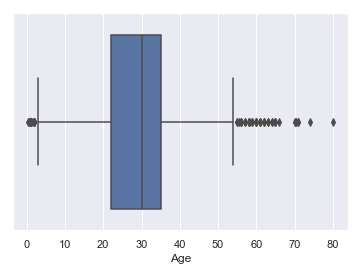

In [37]:
fig,ax=plt.subplots()
sns.set_style('white')
ax=sns.boxplot(x='Age',data=data)

In the variable Age, we find that there are certain outliers above the age 64. In order to treat the outliers, we can transform the age variable either by transformation or binning. In my analysis, I consider adaptive binning using 4 quartiles to transform the variable. 

In [35]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = data['Age'].quantile(quantile_list)
print(quantiles)

quantile_labels = ['0', '1', '2', '3']
data['Age_label']=pd.qcut(data['Age'],q=quantile_list,labels=quantile_labels)
print(data[['Age_label','Age']].iloc[5:10])

test['Age_label']=pd.qcut(test['Age'],q=quantile_list,labels=quantile_labels)
print(test[['Age_label','Age']].iloc[5:10])

0.00     0.42
0.25    22.00
0.50    30.00
0.75    35.00
1.00    80.00
Name: Age, dtype: float64
  Age_label        Age
5         2  30.726645
6         3  54.000000
7         0   2.000000
8         1  27.000000
9         0  14.000000
  Age_label   Age
5         0  14.0
6         2  30.0
7         1  26.0
8         0  18.0
9         0  21.0


c:\users\akhil reddy\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Similarly, we use 5 quartiles to transform the Fare variable.

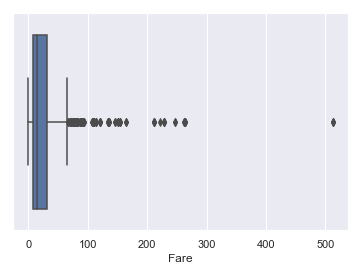

In [34]:
fig,ax=plt.subplots()

ax=sns.boxplot(x='Fare',data=data)

In [36]:
quantile_list = [0, .2, .4, .6, .8, 1.]
quantiles = data['Fare'].quantile(quantile_list)
print(quantiles)

quantile_labels = ['0', '1', '2', '3','4']
data['Fare_label'] = pd.qcut(data['Fare'],q=quantile_list,labels=quantile_labels)
print(data[['Fare_label','Fare']].iloc[5:10])

test['Fare_label'] = pd.qcut(test['Fare'],q=quantile_list,labels=quantile_labels)
print(test[['Fare_label','Fare']].iloc[5:10])

0.0      0.0000
0.2      7.8542
0.4     10.5000
0.6     21.0750
0.8     39.6875
1.0    512.3292
Name: Fare, dtype: float64
  Fare_label     Fare
5          1   8.4583
6          4  51.8625
7          2  21.0750
8          2  11.1333
9          3  30.0708
  Fare_label     Fare
5          1   9.2250
6          0   7.6292
7          3  29.0000
8          0   7.2292
9          3  24.1500


c:\users\akhil reddy\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


We now combine Sibsp and Parch variable to determine the number of companions for a particular passenger

c:\users\akhil reddy\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


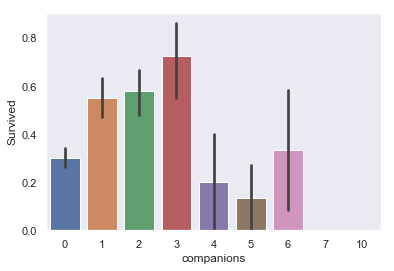

In [38]:
data['companions']=data['SibSp']+data['Parch']
test['companions']=test['SibSp']+test['Parch']
sns.set_style('dark')
sns.barplot(x='companions',y='Survived',data=data)

We could factorize the companions feature into a two level variable, but we would lose valuable information in terms of survival. For example, people with more than 3 companions had a low survival rate. So, we leave it as an ordinal variable 

Thus, since we are now ready with the data analysis, let us drop the irrelevant columns **(PassengerId, Name, Ticket, Cabin)** and the columns on which feature engineering was carried out.

In [39]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_label,Fare_label,companions
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,4,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,4,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1,0


In [40]:
data.drop(['PassengerId','Name','Ticket','Age','Fare','Cabin'],axis=1,inplace=True)
data.head(5)

c:\users\akhil reddy\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_label,Fare_label,companions
0,0,3,male,1,0,S,0,0,1
1,1,1,female,1,0,C,3,4,1
2,1,3,female,0,0,S,1,1,0
3,1,1,female,1,0,S,2,4,1
4,0,3,male,0,0,S,2,1,0


In [41]:
test.drop(['PassengerId','Name','Ticket','Age','Fare','Cabin'],axis=1,inplace=True)
test.head(5)

,Pclass,Sex,SibSp,Parch,Embarked,Age_label,Fare_label,companions
0,3,male,0,0,Q,2,1,0
1,3,female,1,0,S,3,0,1
2,2,male,0,0,Q,3,1,0
3,3,male,0,0,S,1,1,0
4,3,female,1,1,S,0,2,2


We find that the features Sex and Embarked are categorical in nature. We encode them using labelencoder and onehotencoder.

In [42]:
# First let us separate the data into independent and dependent variables
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

# Label encoder and Onehot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X1=LabelEncoder()
X[:,1]=labelencoder_X1.fit_transform(X[:,1])

labelencoder_X2=LabelEncoder()
X[:,4]=labelencoder_X2.fit_transform(X[:,4])

onehotencoder = OneHotEncoder(categorical_features = [1,4])
X=onehotencoder.fit_transform(X).toarray()

c:\users\akhil reddy\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\akhil reddy\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [43]:
print(X[0:5,:])

[[0. 1. 0. 0. 1. 3. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 1. 0. 3. 4. 1.]
 [1. 0. 0. 0. 1. 3. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 1. 0. 2. 4. 1.]
 [0. 1. 0. 0. 1. 3. 0. 0. 2. 1. 0.]]


In [52]:
# For test data
X_test=test.iloc[:,:].values
X_test[:,1]=labelencoder_X1.transform(X_test[:,1])
X_test[:,4]=labelencoder_X2.transform(X_test[:,4])
X_test=onehotencoder.transform(X_test).toarray()

In [53]:
print(X_test[0:5,:])

[[0. 1. 0. 1. 0. 3. 0. 0. 2. 1. 0.]
 [1. 0. 0. 0. 1. 3. 1. 0. 3. 0. 1.]
 [0. 1. 0. 1. 0. 2. 0. 0. 3. 1. 0.]
 [0. 1. 0. 0. 1. 3. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 3. 1. 1. 0. 2. 2.]]


## Predictive Models

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X,y)

c:\users\akhil reddy\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
# Prediction for logistic regression
y_pred=classifier.predict(X_test)

# Values for test data
y_act=pd.read_csv('gender_submission.csv').iloc[:,1].values

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_act,y_pred)
print('The accuracy rate of Logistic regression is :',metrics.accuracy_score(y_pred,y_act))

The accuracy rate of Logistic regression is : 0.937799043062201


### KNN

In [71]:
from sklearn.model_selection import GridSearchCV
knn2=KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(1,26)}
knn_gscv=GridSearchCV(knn2, param_grid, cv=5)

knn_gscv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
# The best model
knn_gscv.best_params_

{'n_neighbors': 16}

In [74]:
# Accuracy
print('The accuracy of KNN is: ',knn_gscv.best_score_)

The accuracy of KNN is:  0.8065241844769404


### Maximal Margin Classifier